In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the dataframe with specified columns
df = pd.read_csv("22SevenNetwork.csv")
df

,Date,User,Tweet,URL,Reply_Count,Retweet_Count,Like_Count,Quote_Count,Location
0,2023-03-30 17:54:54+00:00,22seven,https://t.co/Jeb6gqdXBS,https://twitter.com/22seven/status/16414992544...,0,0,0,0,South Africa
1,2023-03-30 17:54:51+00:00,22seven,https://t.co/Gwbc02nJVC,https://twitter.com/22seven/status/16414992423...,1,0,0,0,South Africa
2,2023-03-30 17:54:49+00:00,22seven,https://t.co/HKvRhbylY8,https://twitter.com/22seven/status/16414992320...,1,0,0,0,South Africa
3,2023-03-30 17:54:46+00:00,22seven,https://t.co/tmYb7vez1n,https://twitter.com/22seven/status/16414992205...,1,0,0,0,South Africa
4,2023-03-30 17:54:44+00:00,22seven,https://t.co/QzjRJgXKvW,https://twitter.com/22seven/status/16414992105...,1,0,0,0,South Africa
...,...,...,...,...,...,...,...,...,...
15634,2012-01-25 14:55:41+00:00,The_Svens,Christo (our uber-Sven) and the team are in Jo...,https://twitter.com/The_Svens/status/162186886...,0,0,0,0,South Africa
15635,2012-01-25 06:15:49+00:00,linder_kate,Circa Gallery #22seven http://t.co/dBvSyLUp,https://twitter.com/linder_kate/status/1620560...,0,0,0,0,Cape Town
15636,2012-01-25 06:14:03+00:00,linder_kate,Circa Gallery #22seven http://t.co/zY2GS6E8,https://twitter.com/linder_kate/status/1620556...,0,0,0,0,Cape Town
15637,2012-01-25 04:59:06+00:00,linder_kate,@JaneSpick @BrenWade1 JHB better be ready for ...,https://twitter.com/linder_kate/status/1620367...,0,0,0,0,Cape Town


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15639 entries, 0 to 15638
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           15639 non-null  object
 1   User           15639 non-null  object
 2   Tweet          15639 non-null  object
 3   URL            15639 non-null  object
 4   Reply_Count    15639 non-null  int64 
 5   Retweet_Count  15639 non-null  int64 
 6   Like_Count     15639 non-null  int64 
 7   Quote_Count    15639 non-null  int64 
 8   Location       14257 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [4]:
# Remove rows with User = 22seven
df = df[df.User != "22seven"]

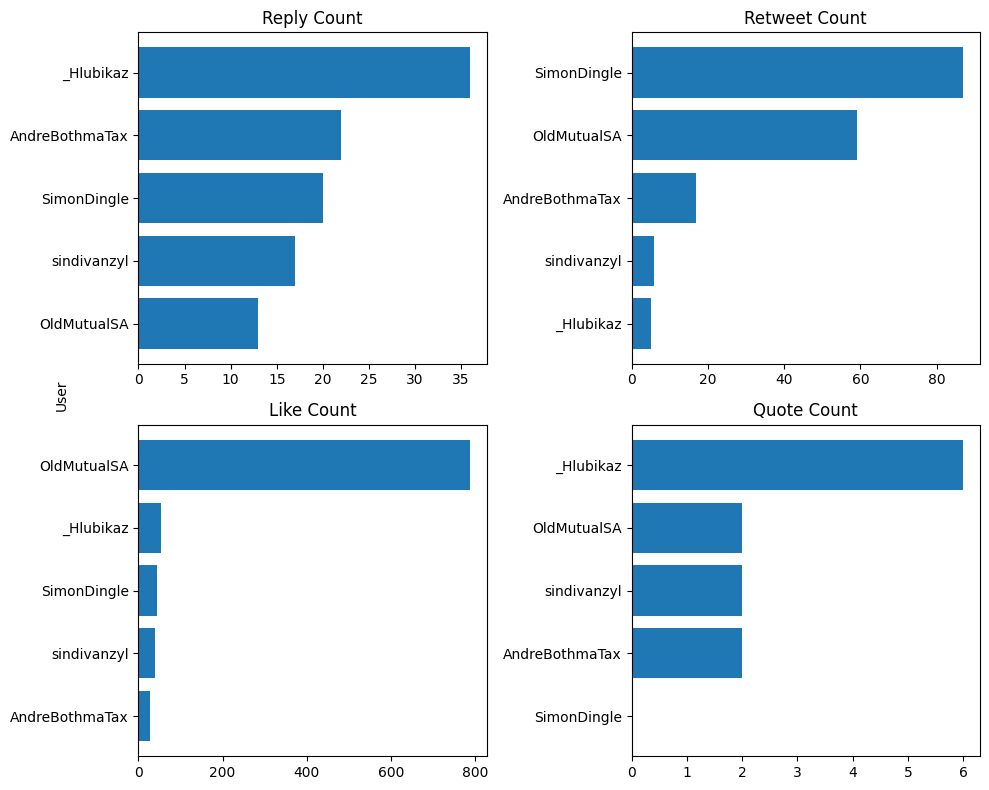

In [7]:
# Take only the top 5 users and extract the necessary columns
df_counts = df.nlargest(5, ['Reply_Count', 'Retweet_Count', 'Like_Count', 'Quote_Count'])[['User', 'Reply_Count', 'Retweet_Count', 'Like_Count', 'Quote_Count']]

# Create a 2x2 grid of subplots and set the figure size
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Iterate over the subplots and plot the corresponding variable
for i, var in enumerate(['Reply_Count', 'Retweet_Count', 'Like_Count', 'Quote_Count']):
    df_sorted = df_counts.sort_values(by=var)
    axs[i//2, i%2].barh(df_sorted['User'], df_sorted[var])
    axs[i//2, i%2].set_title(var.replace('_', ' '))

# Add a common y-label for all subplots
fig.text(0.06, 0.5, 'User', va='center', rotation='vertical')

# Adjust the layout of the subplots
fig.tight_layout()

# Display the plot
plt.show()


In [8]:
# Define a list of count variables
count_vars = ['Reply_Count', 'Retweet_Count', 'Like_Count', 'Quote_Count']

# Iterate over the count variables and print the top 5 users for each
for var in count_vars:
    top5_users = df_counts.nlargest(5, var)['User'].tolist()
    print(f'Top 5 Users by {var.replace("_", " ")}:')
    print(top5_users)
    print()


Top 5 Users by Reply Count:
['_Hlubikaz', 'AndreBothmaTax', 'SimonDingle', 'sindivanzyl', 'OldMutualSA']

Top 5 Users by Retweet Count:
['SimonDingle', 'OldMutualSA', 'AndreBothmaTax', 'sindivanzyl', '_Hlubikaz']

Top 5 Users by Like Count:
['OldMutualSA', '_Hlubikaz', 'SimonDingle', 'sindivanzyl', 'AndreBothmaTax']

Top 5 Users by Quote Count:
['_Hlubikaz', 'AndreBothmaTax', 'sindivanzyl', 'OldMutualSA', 'SimonDingle']

